In [5]:
import tensorflow as tf
import keras
import pandas as pd
import pathlib
import PIL
import zipfile
from PIL import Image
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from matplotlib import pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/AML/proj-data
%ls

/content/drive/My Drive/AML/proj-data
articles.csv  images.zip  sample_submission.csv  transactions_train.csv


In [ ]:
images_ds = "images.zip"
imgzip = zipfile.ZipFile(images_ds)

with imgzip as archive:
  # for entry in archive.infolist():
  img_filenames = [entry.filename.split("/")[1].split(".")[0] for entry in archive.infolist()]
    # with archive.open(entry) as file:
    #   img = Image.open(file)
      # display(img)
      # print(img.size, img.mode, len(img.getdata()))
len(img_filenames)


105100

# Article df analysis

In [ ]:
article_df = pd.read_csv("articles.csv")
article_df

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [ ]:
print(len(article_df))
present_images = [id for id in article_df["article_id"] if id in img_filenames]
len(article_df) - len(present_images)

105542


105542

In [ ]:
article_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
article_df["prod_name"]

0                      Strap top
1                      Strap top
2                  Strap top (1)
3              OP T-shirt (Idro)
4              OP T-shirt (Idro)
                   ...          
105537    5pk regular Placement1
105538         SPORT Malaga tank
105539           Cartwheel dress
105540          CLAIRE HAIR CLAW
105541              Lounge dress
Name: prod_name, Length: 105542, dtype: object

In [ ]:
article_df["product_group_name"].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [ ]:
article_df["section_name"].unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [ ]:
article_df["department_name"].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [ ]:
# different articles if diff color
article_df[article_df["prod_name"] == "OP T-shirt (Idro)"]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# cleanup stop words from description

stop_words = set(stopwords.words('english'))
article_df['clean_desc'] = article_df['detail_desc'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop_words)]))


In [ ]:
# unique products
len(article_df["prod_name"].unique())

45875

In [ ]:
actual_color = article_df.groupby("colour_group_name")['article_id'].count().sort_values(ascending=False)
perceived_master = article_df.groupby("perceived_colour_master_name")['article_id'].count().sort_values(ascending=False).reset_index(name="count")
print(perceived_master)
perceived_val = article_df.groupby("perceived_colour_value_name")['article_id'].count().sort_values(ascending=False).reset_index(name="count")
print(perceived_val)

   perceived_colour_master_name  count
0                         Black  22585
1                          Blue  18469
2                         White  12665
3                          Pink   9403
4                          Grey   8924
5                           Red   5878
6                         Beige   5657
7                         Green   3526
8                   Khaki green   3181
9                        Yellow   3121
10                       Orange   2734
11                        Brown   2269
12                        Metal   2180
13                    Turquoise   1829
14                         Mole   1223
15                 Lilac Purple   1100
16                      Unknown    685
17                    undefined    105
18              Yellowish Green      5
19                 Bluish Green      3
  perceived_colour_value_name  count
0                        Dark  42706
1                 Dusty Light  22152
2                       Light  15739
3                Medium Dusty  12

In [ ]:
article_df.groupby("product_group_name")['article_id'].count().sort_values(ascending=False)

product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: article_id, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

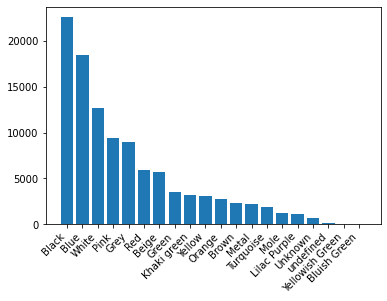

In [ ]:
plt.bar(perceived_master["perceived_colour_master_name"], perceived_master["count"])
plt.xticks(rotation=45, ha='right')

In [ ]:
product_grp_types = article_df.groupby("product_group_name")['article_id'].count().sort_values(ascending=False).reset_index(name="count")
less_cnt_grps = product_grp_types[product_grp_types["count"] < 10]
less_cnt_grps

,product_group_name,count
15,Garment and Shoe care,9
16,Stationery,5
17,Interior textile,3
18,Fun,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


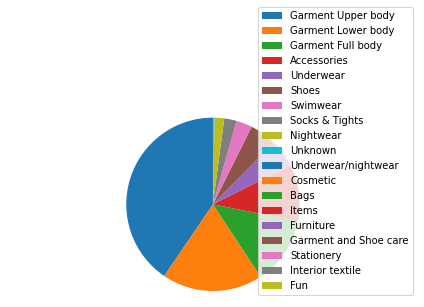

In [ ]:
# plt.bar(product_grp_types["product_group_name"], product_grp_types["count"])
# plt.xticks(rotation=45, ha='right')


# fig1, ax1 = plt.subplots()
# ax1.pie(product_grp_types["count"], labels=product_grp_types["product_group_name"], autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()
patches, texts = plt.pie(product_grp_types["count"], startangle=90)
plt.legend(patches, labels=product_grp_types["product_group_name"], loc="lower right")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# drop
len(article_df[article_df["product_group_name"].isin(less_cnt_grps["product_group_name"])])

19

In [ ]:
# drop
product_types = article_df.groupby("product_type_name")['article_id'].count().sort_values(ascending=True).reset_index(name="count")
product_types[product_types["count"] < 10]

,product_type_name,count
0,Pre-walkers,1
1,Bra extender,1
2,Headband,1
3,Keychain,1
4,Bumbag,1
5,Wood balls,1
6,Clothing mist,1
7,Sewing kit,1
8,Blanket,1
9,Towel,1


# Customers analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers.csv


In [3]:
import io

In [15]:
#cust_df = pd.read_csv("customers.csv.zip")
cust_df = pd.read_csv(io.BytesIO(uploaded["customers.csv"]))
print(cust_df.columns)
cust_df

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [16]:
#Replacing Nan with approriate values in the column to be used later
cust_df["FN"] = cust_df["FN"].fillna(0)
cust_df["Active"] = cust_df["Active"].fillna(0)
cust_df["club_member_status"] = cust_df["club_member_status"].fillna("NEVER A MEMBER")
cust_df["fashion_news_frequency"] = cust_df["fashion_news_frequency"].fillna("None")
cust_df["fashion_news_frequency"] = cust_df["fashion_news_frequency"].replace(to_replace = ["NONE","none"], value = "None")

In [17]:
# Check nans
print("len:",len(cust_df))
print(f"customer_id: {cust_df['customer_id'].isnull().sum()}")
print("FN:",cust_df['FN'].isnull().sum())
print("Active:",cust_df['Active'].isnull().sum())
print("club_member_status:", cust_df['club_member_status'].isnull().sum())
print("fashion_news_frequency:", cust_df['fashion_news_frequency'].isnull().sum())
print("age:", cust_df['age'].isnull().sum())
print("postal_code:", cust_df['postal_code'].isnull().sum())

len: 1371980
customer_id: 0
FN: 0
Active: 0
club_member_status: 0
fashion_news_frequency: 0
age: 15861
postal_code: 0


In [66]:
cust_df['club_member_status'].value_counts()


ACTIVE            1272491
PRE-CREATE          92960
NEVER A MEMBER       6062
LEFT CLUB             467
Name: club_member_status, dtype: int64

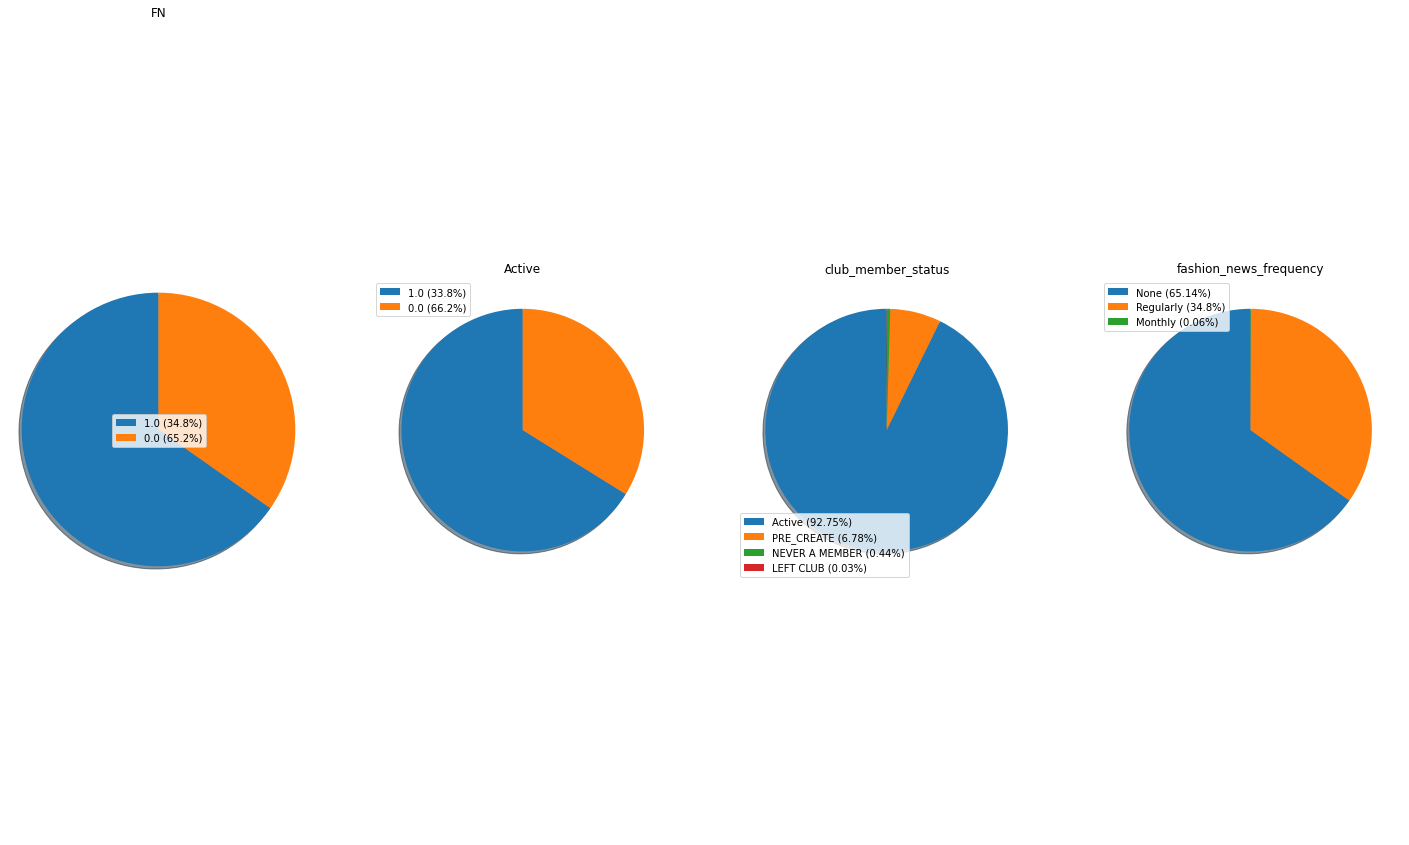

<Figure size 1728x1728 with 0 Axes>

In [78]:
# check unique values
# features: customer_id, fn, Active, club_member_status, age


fn_vc = cust_df[["FN"]].value_counts(dropna=False).reset_index(name="counts")
fn_news_vs = cust_df[["fashion_news_frequency"]].value_counts(dropna=False).reset_index(name="counts")
active_vc = cust_df[["Active"]].value_counts(dropna=False).reset_index(name="counts")
status_vc = cust_df[["club_member_status"]].value_counts(dropna=False).reset_index(name="counts")
age_vc = cust_df[["age"]].value_counts(dropna=False).reset_index(name="counts")

fig1, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize = (25, 15))
plt.figure(figsize = (24, 24))
patches_fn, text_fn =ax1.pie(fn_vc["counts"],
        shadow=True, startangle=90)
patches_active, text_active = ax2.pie(active_vc["counts"],
        shadow=True, startangle=90)
patches_status, text_status  = ax3.pie(status_vc["counts"],
        shadow=True, startangle=90)
        
patches_fn_news, text_fn_news = ax4.pie(fn_news_vs["counts"],
        shadow=True, startangle=90)

labels_fn = [r'1.0 (34.8%)', r'0.0 (65.2%)']
labels_active = [r'1.0 (33.8%)', r'0.0 (66.2%)']
labels_status = [r'Active (92.75%)', r'PRE_CREATE (6.78%)', r'NEVER A MEMBER (0.44%)', r'LEFT CLUB (0.03%)']
labels_fn_news = [r'None (65.14%)', r'Regularly (34.8%)', r'Monthly (0.06%)']

#ax1.legend(fn_vc["FN"],loc ="center")
ax1.legend(patches_fn, labels_fn,loc ="center")
ax1.title.set_text("FN")
#ax2.legend(active_vc["Active"])
ax2.legend(patches_active, labels_active,loc ="best")
ax2.title.set_text("Active")
#ax3.legend(status_vc["club_member_status"])
ax3.legend(patches_status, labels_status,loc = "best")
ax3.title.set_text("club_member_status")
#ax4.legend(fn_news_vs["fashion_news_frequency"], loc="lower right")
ax4.legend(patches_fn_news, labels_fn_news,loc ="best")
ax4.title.set_text("fashion_news_frequency")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

([<matplotlib.axis.XTick at 0x7ff5e01ea410>,
 <a list of 9 Text major ticklabel objects>)

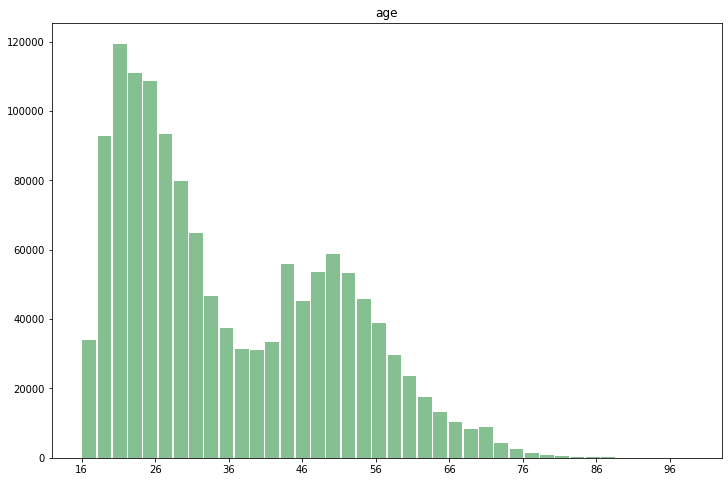

In [ ]:
#  age group
cust_df.hist(column='age', bins=40, grid=False, figsize=(12,8)
, color='#86bf91', zorder=2, rwidth=0.9)
plt.xticks(np.arange(min(cust_df["age"]), max(cust_df["age"])+1, 10.0))